<img src="https://github.com/pastas/pastas/blob/dev/doc/_static/logo_graz.png?raw=true" align="right" width=250>

# Diagnostic checking of Pastas Models
*R.A. Collenteur, University of Graz, March 2020*

This notebook describes how to perform diagnostic checking of a Pastas model after calibration. Diagnostic checking is an important step in the modeling process where the model is checked to make sure the model adequately describes the time series. The goal of this notebook is to describe how to perform a model verification for a Pastas model. We will refer to the series that was minimized during parameter estimation as the "residuals". In practice in Pastas models, these can come from `ml.noise()` or `ml.residuals()`, depending whether or not a noisemodel was applied or not. Regardless of this the residuals always have to comply with the same assumptions. After parameter estimation, the residuals or noise series are assumed to be:

- independent, 
- homoscedastic (i.e. have a constant variance),
- and normally distributed.

Of these three assumptions, the first is the most important, having the largest impact on the standard errors of the estimated parameters (Hipel & McLeod, 1994). Additionally the model residuals should be uncorrelated with any of the input time series.

In [5]:
# Import necessary packages
import pandas as pd
import pastas as ps

import matplotlib.pyplot as plt

%matplotlib notebook

ps.set_log_level("ERROR")

In [7]:
ml = ps.io.load("model.pas")
res = ml.noise()
ml.plots.results()

Exception ignored in: <function Comm.__del__ at 0x7f809dc35b90>
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/py37_pastas/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 76, in __del__
    self.close()
  File "/Applications/anaconda3/envs/py37_pastas/lib/python3.7/site-packages/ipykernel/comm/comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "/Applications/anaconda3/envs/py37_pastas/lib/python3.7/site-packages/ipykernel/comm/manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('673866264cce40a49db6d9a72fe53a4b',)


<IPython.core.display.Javascript object>

## 1. Checking for autocorrelation
First we check if the model residuals are independent of each other and are thus not correlated. Since we are dealing with model residuals in time, we can refer to this correlation as autocorrelation. Whereas many time series models have equidistant time steps, the resisuals of Pastas models can have non-equidistant time steps. To deal with this property, functions have been implemented in Pastas that can deal with non-equidistant time steps. We therefore recommend to use the statistical methods supplied in Pastas, unless the modeller is sure he/she is dealing with equidistant time steps.

The following tests for autocorrelation are available:

- Visualisation of ACF and PACF
- Portmanteau test
- Runstest

Let us plot the autocorrelation function (ACF) and the partial autocorrelation function (PACF) first and perform a visual interpretation of the models residuals.

## 2. Checking for homoscedasticity
The second assumption we check is if the residuals are homoscedastic, 
The following tests for homoscedasticity are available:

- Visualisation of residuals
- Engle test
- Breusch-Pagaan test

## 3. Checking for Normal distribution
A common assumption is that the residuals follow a normal distribution, although this is not always necessary. An easy method to asses the normality of the residuals is to plot 

The following tests are available:

- Visualisation of residuals
- shapiro-wilk
- D'Agostino-K2     

## 4. Model verification in practice
To check all the assumptions mentioned above at once, Pastas has two methods to perform all of the above tests in batch. The first method plots a collection of the visualisations (`ml.plots.diagnostics()`) and the second methods runs all statistical tests in batch (`ml.stats.diagnostics()`). Running these methods for every Pastas Model is highly recommended when modeling time series with Pastas.


In [14]:
import numpy as np
random_seed = np.random.RandomState(1234)
noise = pd.Series(random_seed.normal(0,1,1000))
ps.stats.diagnostics(noise, alpha=0.05)

,Checks,Result,P-value
Shapiroo,Normality,0.998506,0.558602
D'Agostino,Normality,0.180541,0.913684
Runs,Autocorrelation,-0.0631509,0.949646


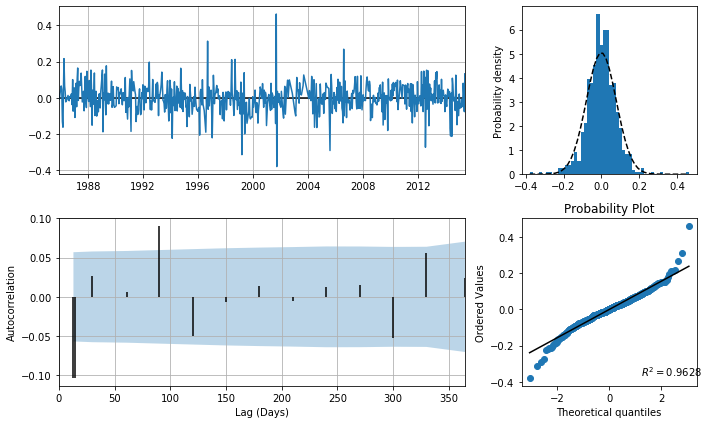

In [4]:
ml.plots.diagnostics();

## References

- Stoffer, D. S., & Toloi, C. M. (1992). A note on the Ljung—Box—Pierce portmanteau statistic with missing data. Statistics & probability letters, 13(5), 391-396.